# Plot boxplots

In [1]:
#library(repr)
library(ggpubr)
library(ggsignif)
library(tidyverse)

Loading required package: ggplot2

-- Attaching packages --------------------------------------------------------------------------------------------------------------------- tidyverse 1.3.0 --

v tibble  3.0.6     v dplyr   1.0.4
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1
v purrr   0.3.4     

-- Conflicts ------------------------------------------------------------------------------------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



## Functions

In [2]:
add_symnum <- function(res){
    symnum.args <- list(cutpoints = c(0, 0.0001, 0.001, 0.01, 0.05,  1),
                        symbols = c("****", "***", "**", "*",  "ns"))
    symnum.args$x <- res$adj.P.Val
    pvalue.signif <- do.call(stats::symnum, symnum.args) %>%
    as.character()
    pvalue.format <- format.pval(res$adj.P.Val, digits = 2)
    res <- res %>%
    dplyr::ungroup() %>%
    mutate(FDR = pvalue.format, p.signif = pvalue.signif)
    return(res)
}


save_ggplots <- function(fn, p, w, h){
    for(ext in c('.pdf', '.png', '.svg')){
        ggsave(paste0(fn, ext), plot=p, width=w, height=h)
    }
}

## Gene annotation

### Caudate vs DLPFC

In [4]:
deg_file = '../../_m/genes/diffExpr_CvD_sex_full.txt'
deg_cd = read.delim(deg_file, row.names=1) %>% filter(Symbol %in% c("ANK3", "EML1", "PKIG")) %>% 
    select(-c(Length, Class, meanExprs, NumTx, gene_type, gencodeTx)) %>% mutate(Comparison="C_vs_D")
deg_cd = add_symnum(deg_cd)
deg_cd

,gencodeID,ensemblID,Symbol,EntrezID,logFC,AveExpr,t,P.Value,adj.P.Val,z.std,Comparison,FDR,p.signif
,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
ENSG00000066629.16,ENSG00000066629.16,ENSG00000066629,EML1,2009,-0.2265531,5.678690,-5.362231,1.092187e-07,9.934005e-05,-5.310677,C_vs_D,9.9e-05,****
ENSG00000151150.21,ENSG00000151150.21,ENSG00000151150,ANK3,288,-0.1626286,9.198901,-4.237854,2.535267e-05,6.308748e-03,-4.211637,C_vs_D,0.0063,**
ENSG00000168734.13,ENSG00000168734.13,ENSG00000168734,PKIG,11142,0.1159521,4.648260,2.813194,5.031208e-03,9.118879e-02,2.805029,C_vs_D,0.0912,ns


### Caudate vs Hippocampus

In [5]:
deg_file = '../../_m/genes/diffExpr_CvH_sex_full.txt'
deg_ch = read.delim(deg_file, row.names=1) %>% filter(Symbol %in% c("ANK3", "EML1", "PKIG")) %>% 
    select(-c(Length, Class, meanExprs, NumTx, gene_type, gencodeTx)) %>% mutate(Comparison="C_vs_H")
deg_ch = add_symnum(deg_ch)
deg_ch

,gencodeID,ensemblID,Symbol,EntrezID,logFC,AveExpr,t,P.Value,adj.P.Val,z.std,Comparison,FDR,p.signif
,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
ENSG00000066629.16,ENSG00000066629.16,ENSG00000066629,EML1,2009,-0.21945536,5.678690,-5.260760,1.894412e-07,0.000499689,-5.209411,C_vs_H,0.0005,***
ENSG00000151150.21,ENSG00000151150.21,ENSG00000151150,ANK3,288,-0.11356455,9.198901,-3.030135,2.530977e-03,0.292363133,-3.019613,C_vs_H,0.2924,ns
ENSG00000168734.13,ENSG00000168734.13,ENSG00000168734,PKIG,11142,-0.05917591,4.648260,-1.436159,1.513888e-01,0.778109534,-1.434643,C_vs_H,0.7781,ns


### DLPFC vs Hippocampus

In [6]:
deg_file = '../../_m/genes/diffExpr_DvH_sex_full.txt'
deg_dh = read.delim(deg_file, row.names=1) %>% filter(Symbol %in% c("ANK3", "EML1", "PKIG")) %>% 
    select(-c(Length, Class, meanExprs, NumTx, gene_type, gencodeTx)) %>% mutate(Comparison="D_vs_H")
deg_dh = add_symnum(deg_dh)
deg_dh

,gencodeID,ensemblID,Symbol,EntrezID,logFC,AveExpr,t,P.Value,adj.P.Val,z.std,Comparison,FDR,p.signif
,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
ENSG00000168734.13,ENSG00000168734.13,ENSG00000168734,PKIG,11142,0.175128009,4.648260,4.1644739,3.491091e-05,0.04003674,4.138812,D_vs_H,0.04,*
ENSG00000151150.21,ENSG00000151150.21,ENSG00000151150,ANK3,288,-0.049064078,9.198901,-1.2810268,2.005864e-01,0.65174532,-1.279883,D_vs_H,0.65,ns
ENSG00000066629.16,ENSG00000066629.16,ENSG00000066629,EML1,2009,-0.007097771,5.678690,-0.1660764,8.681428e-01,0.97030253,-0.166018,D_vs_H,0.97,ns


### Merge gene annotation

In [7]:
gene_annot = rbind(deg_cd, deg_ch, deg_dh)
gene_annot

,gencodeID,ensemblID,Symbol,EntrezID,logFC,AveExpr,t,P.Value,adj.P.Val,z.std,Comparison,FDR,p.signif
,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
ENSG00000066629.16,ENSG00000066629.16,ENSG00000066629,EML1,2009,-0.226553133,5.678690,-5.3622309,1.092187e-07,9.934005e-05,-5.310677,C_vs_D,9.9e-05,****
ENSG00000151150.21,ENSG00000151150.21,ENSG00000151150,ANK3,288,-0.162628625,9.198901,-4.2378545,2.535267e-05,6.308748e-03,-4.211637,C_vs_D,0.0063,**
ENSG00000168734.13,ENSG00000168734.13,ENSG00000168734,PKIG,11142,0.115952095,4.648260,2.8131941,5.031208e-03,9.118879e-02,2.805029,C_vs_D,0.0912,ns
ENSG00000066629.161,ENSG00000066629.16,ENSG00000066629,EML1,2009,-0.219455362,5.678690,-5.2607601,1.894412e-07,4.996890e-04,-5.209411,C_vs_H,0.0005,***
ENSG00000151150.211,ENSG00000151150.21,ENSG00000151150,ANK3,288,-0.113564546,9.198901,-3.0301350,2.530977e-03,2.923631e-01,-3.019613,C_vs_H,0.2924,ns
ENSG00000168734.131,ENSG00000168734.13,ENSG00000168734,PKIG,11142,-0.059175914,4.648260,-1.4361594,1.513888e-01,7.781095e-01,-1.434643,C_vs_H,0.7781,ns
ENSG00000168734.132,ENSG00000168734.13,ENSG00000168734,PKIG,11142,0.175128009,4.648260,4.1644739,3.491091e-05,4.003674e-02,4.138812,D_vs_H,0.04,*
ENSG00000151150.212,ENSG00000151150.21,ENSG00000151150,ANK3,288,-0.049064078,9.198901,-1.2810268,2.005864e-01,6.517453e-01,-1.279883,D_vs_H,0.65,ns
ENSG00000066629.162,ENSG00000066629.16,ENSG00000066629,EML1,2009,-0.007097771,5.678690,-0.1660764,8.681428e-01,9.703025e-01,-0.166018,D_vs_H,0.97,ns


## Load residualized data

In [8]:
res_file = '../../_m/genes/residualized_expression.tsv'
resdf0 = data.table::fread(res_file) %>% 
    filter(Geneid %in% gene_annot$gencodeID) %>% 
    column_to_rownames("Geneid") %>% t %>% data.frame
resdf0 %>% head(2)

,ENSG00000151150.21,ENSG00000066629.16,ENSG00000168734.13
,<dbl>,<dbl>,<dbl>
R11135,-0.1831020,-0.18801988,-0.57172700
R11137,-0.2833243,-0.02690109,0.02113844


## Load phenotype data

In [11]:
pheno_file = '/ceph/projects/v3_phase3_paper/inputs/phenotypes/merged/_m/merged_phenotypes.csv'
pheno = read.csv(pheno_file, row.names=1) %>% 
    mutate_if(is.character, as.factor) 
levels(pheno$Sex) <- c("Female", "Male")
head(pheno, 2)

,BrNum,RNum,Region,RIN,Age,Sex,Race,Dx
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>
R12864,Br1303,R12864,Caudate,9.6,42.98,Female,AA,Schizo
R12865,Br1320,R12865,Caudate,9.5,53.12,Male,AA,Schizo


## Merge dataframe

In [12]:
resdf <- inner_join(rownames_to_column(pheno), 
                    rownames_to_column(resdf0), 
                    by="rowname")
dim(resdf)
resdf[1:2, 1:11]

[1] 1130   12

,rowname,BrNum,RNum,Region,RIN,Age,Sex,Race,Dx,ENSG00000151150.21,ENSG00000066629.16
,<chr>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>
1,R12864,Br1303,R12864,Caudate,9.6,42.98,Female,AA,Schizo,-0.07895446,0.69662335
2,R12865,Br1320,R12865,Caudate,9.5,53.12,Male,AA,Schizo,0.19998270,0.08301898


## Melt data frame

In [17]:
df = resdf %>% select(c('rowname', 'Sex', "Region", starts_with('ENSG'))) %>%
    pivot_longer(-c(rowname, Sex, Region), names_to = "gencodeID", values_to = "Res") %>%
    inner_join(gene_annot, by='gencodeID') %>% 
    select(rowname, Sex, Region, gencodeID, Res, Symbol) %>% distinct %>%
    mutate_at(vars("Symbol", "Region", "gencodeID", "Sex"), as.factor)
levels(df$Sex) <- c("Female", "Male")
levels(df$Region) <- c("Caudate", "DLPFC", "Hippocampus")
head(df, 3)

rowname,Sex,Region,gencodeID,Res,Symbol
<chr>,<fct>,<fct>,<fct>,<dbl>,<fct>
R12864,Female,Caudate,ENSG00000151150.21,-0.07895446,ANK3
R12864,Female,Caudate,ENSG00000066629.16,0.69662335,EML1
R12864,Female,Caudate,ENSG00000168734.13,-0.16678869,PKIG


### Initial ggplot with ggpubr

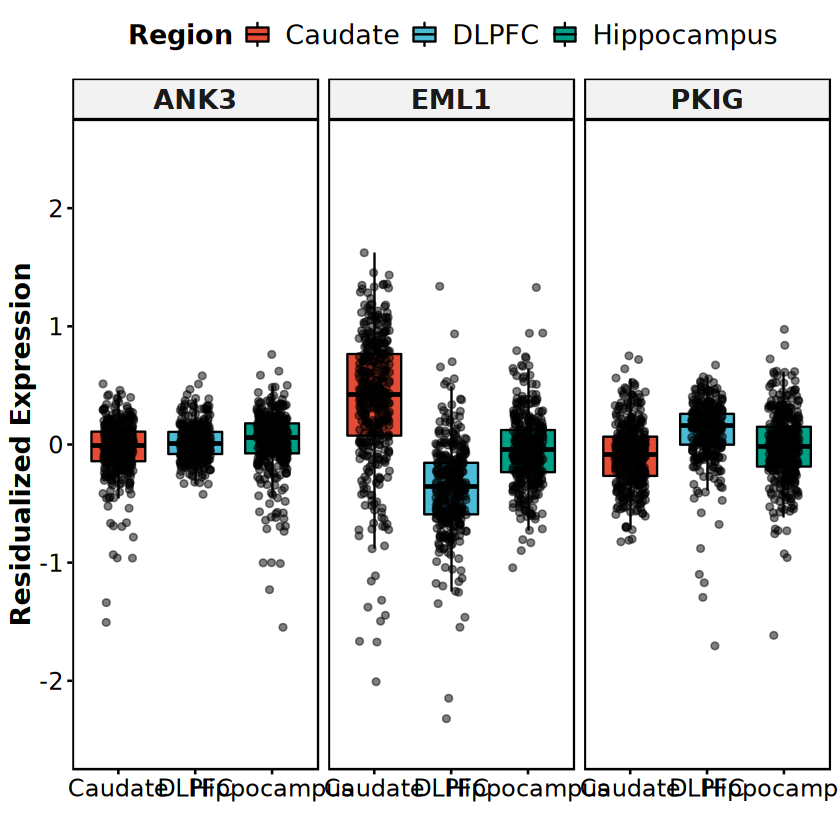

In [18]:
tmp = gene_annot %>% mutate(group1='Female', group2='Male', y_pos=3)

bxp_r <- ggboxplot(df, x="Region", y="Res", facet.by=c("Symbol"), ncol=4, 
                   fill="Region", xlab='', palette="npg", outlier.shape=NA,
                   panel.labs.font=list(face='bold', size = 16), 
                   ylab='Residualized Expression', add='jitter', ylim=c(-2.5, 2.5),
                  add.params=list(alpha=0.5)) +
         font("xy.title", size=16, face="bold") + font("xy.text", size=14) +
         font("legend.title", size=16, face="bold") + 
         font("legend.text", size=16)
         
bxp_r

In [12]:
save_ggplots('region_interaction_sex_byRegion', bxp_r, 12, 5)

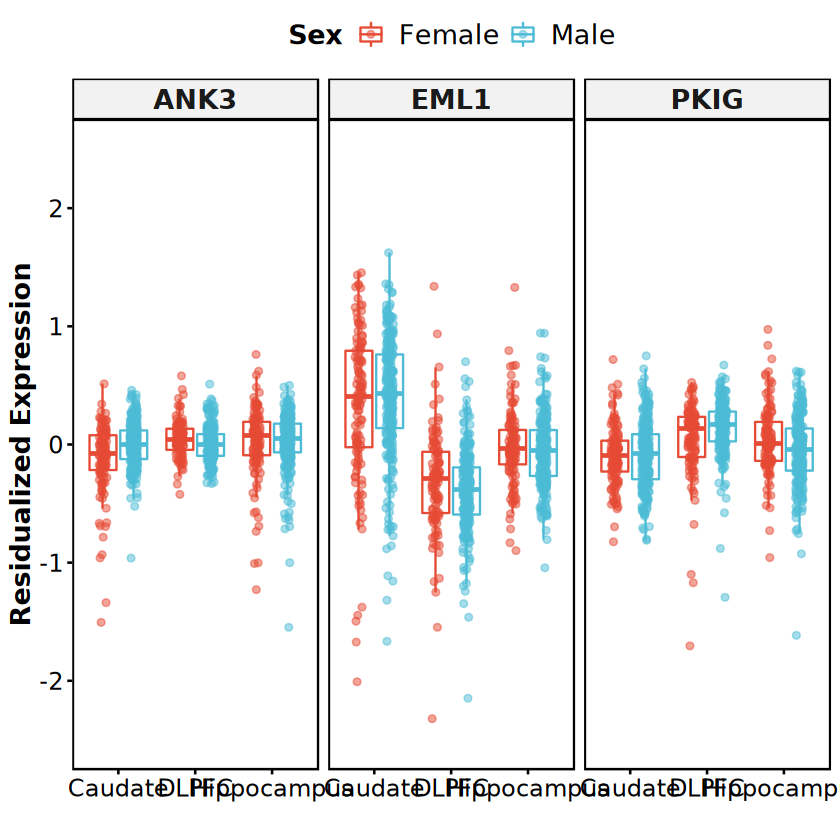

In [21]:
tmp = gene_annot %>% mutate(group1='Female', group2='Male', y_pos=3)
bxp_x <- ggboxplot(df, x="Region", y="Res", facet.by=c("Symbol"), ncol=3, 
                   color="Sex", xlab='', palette="npg", outlier.shape=NA,
                   panel.labs.font=list(face='bold', size = 16), 
                   ylab='Residualized Expression', add='jitter', ylim=c(-2.5, 2.5),
                  add.params=list(alpha=0.5)) + 
    font("xy.title", size=16, face="bold") + font("xy.text", size=14) +
    font("legend.title", size=16, face="bold") + 
    font("legend.text", size=16)
bxp_x

In [14]:
save_ggplots('region_interaction_sex_bySex', bxp_x, 12, 5)

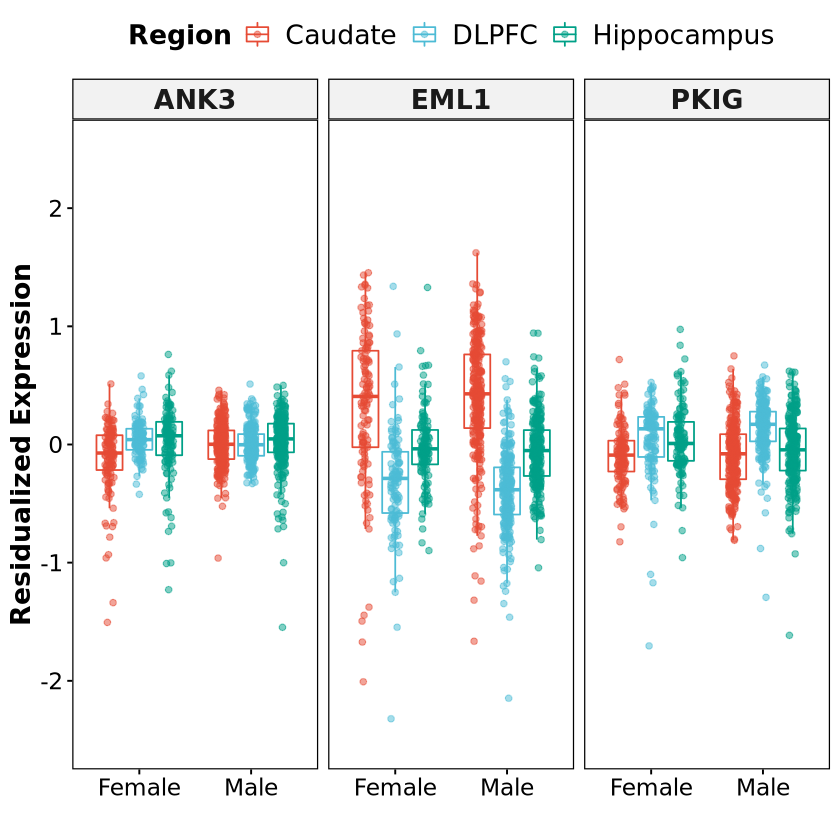

In [26]:
tmp = gene_annot %>% mutate(group1='Female', group2='Male', y_pos=3)

bxp <- ggboxplot(df, x="Sex", y="Res", facet.by=c("Symbol"), ncol=3, 
                   color="Region", xlab='', palette="npg", outlier.shape=NA,
                   panel.labs.font=list(face='bold', size = 16), 
                   ylab='Residualized Expression', add='jitter', ylim=c(-2.5, 2.5),
                  add.params=list(alpha=0.5)) +
         font("xy.title", size=16, face="bold") + font("xy.text", size=14) +
         font("legend.title", size=16, face="bold") + 
         font("legend.text", size=16)
         
bxp

In [16]:
save_ggplots('region_interaction_sex', bxp, 12, 5)

## Reproducibility information

In [ ]:
print("Reproducibility Information:")
Sys.time()
proc.time()
options(width=120)
sessioninfo::session_info()